In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
#Perform a weather check on each city using a series of successive API calls.
#And include a print log of each city as it's being processed (with the city number and city name).

#api.openweathermap.org/data/2.5/weather?q=London&appid={API key}

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        Lat = city_weather['coord']['lat']
        Lng = city_weather['coord']['lon']
        Max_Temp = city_weather['main']['temp_max']
        Humidity = city_weather['main']['humidity']
        Cloudiness = city_weather['clouds']['all']
        Wind_Speed = city_weather['wind']['speed']
        Country = city_weather['sys']['country']
        Date = city_weather['dt']
        
        city_data.append({"City":city, "Lat":Lat, "Lng":Lng, "Max Temp":Max_Temp,"Humidity":Humidity,
                          "Cloudiness":Cloudiness, "Wind Speed":Wind_Speed, "Country":Country, "Date":Date} )
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iquitos
Processing Record 2 of Set 1 | tautira
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | tarakan
Processing Record 5 of Set 1 | grindavik
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | intipuca
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | monrovia
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | muromtsevo
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | meulaboh
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | atuona
Pro

Processing Record 37 of Set 4 | lazaro cardenas
Processing Record 38 of Set 4 | elko
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | zalantun
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | kholodnyy
Processing Record 43 of Set 4 | green river
Processing Record 44 of Set 4 | erenhot
Processing Record 45 of Set 4 | tabou
Processing Record 46 of Set 4 | kisangani
Processing Record 47 of Set 4 | pilot butte
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 0 of Set 5 | magistralnyy
Processing Record 1 of Set 5 | ahmadpur east
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | maghama
City not found. Skipping...
Processing Record 4 of Set 5 | samarai
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | liberty
Processing Record 7 of Set 5 | nikolskoye
Processing Record 8 of Set 5 | fallon
Processing Record 9 of Se

Processing Record 30 of Set 8 | male
Processing Record 31 of Set 8 | mariel
Processing Record 32 of Set 8 | bud
Processing Record 33 of Set 8 | paracatu
Processing Record 34 of Set 8 | aklavik
Processing Record 35 of Set 8 | oltu
Processing Record 36 of Set 8 | bouar
Processing Record 37 of Set 8 | aksarka
Processing Record 38 of Set 8 | kalmunai
Processing Record 39 of Set 8 | mangrol
Processing Record 40 of Set 8 | plettenberg bay
Processing Record 41 of Set 8 | kaarina
Processing Record 42 of Set 8 | cap malheureux
Processing Record 43 of Set 8 | baruun-urt
Processing Record 44 of Set 8 | tra vinh
Processing Record 45 of Set 8 | pedernales
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | sovetsk
Processing Record 48 of Set 8 | emerald
Processing Record 49 of Set 8 | bacolod
Processing Record 0 of Set 9 | eenhana
Processing Record 1 of Set 9 | gopalpur
Processing Record 2 of Set 9 | acayuca
Processing Record 3 of Set 9 | bilibino
Processing Record 4 of Set 9 

Processing Record 20 of Set 12 | sioux lookout
Processing Record 21 of Set 12 | sakakah
Processing Record 22 of Set 12 | hisor
Processing Record 23 of Set 12 | estelle
Processing Record 24 of Set 12 | qeshm
Processing Record 25 of Set 12 | marcona
City not found. Skipping...
Processing Record 26 of Set 12 | leutkirch
Processing Record 27 of Set 12 | dawson creek
Processing Record 28 of Set 12 | bambous virieux
Processing Record 29 of Set 12 | iracoubo
Processing Record 30 of Set 12 | arman
Processing Record 31 of Set 12 | bogota
Processing Record 32 of Set 12 | liverpool
Processing Record 33 of Set 12 | tougue
Processing Record 34 of Set 12 | gat
Processing Record 35 of Set 12 | tutoia
Processing Record 36 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 12 | balabac
Processing Record 38 of Set 12 | jasper
Processing Record 39 of Set 12 | vanimo
Processing Record 40 of Set 12 | esso
Processing Record 41 of Set 12 | guarda
Processing Record 42 of Set 12 | l

In [4]:
city_weather_df = pd.DataFrame(city_data)
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iquitos,-3.7481,-73.2472,75.20,88,75,2.30,PE,1611675051
1,tautira,-17.7333,-149.1500,75.20,78,75,3.44,PF,1611675051
2,hilo,19.7297,-155.0900,71.60,83,90,8.61,US,1611675051
3,tarakan,3.3000,117.6333,80.69,79,85,10.80,ID,1611675051
4,grindavik,63.8424,-22.4338,26.60,54,0,23.02,IS,1611675051


In [5]:
#Statistical Summary
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.816473,16.553039,50.383064,70.905336,56.046472,9.252857,1.611675e+09
std,33.082166,89.696695,34.110636,20.428082,38.974876,6.429661,5.966460e+01
min,-54.800000,-179.166700,-52.960000,8.000000,0.000000,0.340000,1.611675e+09
25%,-3.800400,-65.712500,32.000000,61.000000,19.000000,4.180000,1.611675e+09
50%,26.620800,22.369000,61.930000,77.000000,75.000000,8.280000,1.611675e+09
75%,47.866700,88.397200,78.440000,85.000000,93.000000,12.660000,1.611675e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,39.120000,1.611675e+09


In [6]:
#Inspect the dataframe to see if there are any cities with humidity over 100
city_weather_df['Humidity'].value_counts()

81    24
93    22
83    22
78    21
82    19
      ..
36     1
37     1
39     1
42     1
8      1
Name: Humidity, Length: 86, dtype: int64

In [7]:
#Display dataframe to show no cities where humidity is over 100
clean_city_data = city_weather_df.loc[city_weather_df["Humidity"]<=100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iquitos,-3.7481,-73.2472,75.20,88,75,2.30,PE,1611675051
1,tautira,-17.7333,-149.1500,75.20,78,75,3.44,PF,1611675051
2,hilo,19.7297,-155.0900,71.60,83,90,8.61,US,1611675051
3,tarakan,3.3000,117.6333,80.69,79,85,10.80,ID,1611675051
4,grindavik,63.8424,-22.4338,26.60,54,0,23.02,IS,1611675051
...,...,...,...,...,...,...,...,...,...
576,sisimiut,66.9395,-53.6735,10.54,94,95,4.18,GL,1611675115
577,dalbandin,28.8947,64.4101,49.57,32,0,5.68,PK,1611675115
578,tulare,36.2666,-118.8009,34.00,93,75,5.75,US,1611674909
579,makat,47.6469,53.3463,25.74,97,53,16.33,KZ,1611675115


In [8]:
#Export the cleaned data into a csv
clean_city_data.to_csv("output_data/city_weather.csv", header=True)

In [9]:
#Read cities csv
world_weather_df = pd.read_csv("output_data/city_weather.csv")
world_weather_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,iquitos,-3.7481,-73.2472,75.20,88,75,2.30,PE,1611675051
1,1,tautira,-17.7333,-149.1500,75.20,78,75,3.44,PF,1611675051
2,2,hilo,19.7297,-155.0900,71.60,83,90,8.61,US,1611675051
3,3,tarakan,3.3000,117.6333,80.69,79,85,10.80,ID,1611675051
4,4,grindavik,63.8424,-22.4338,26.60,54,0,23.02,IS,1611675051


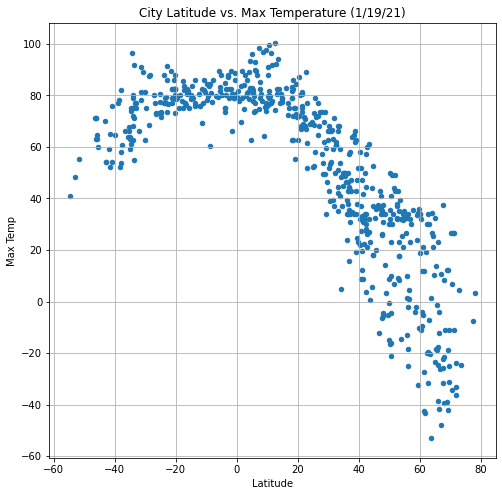

In [20]:
#Latitude vs Temperature Scatter Plot
world_weather_df.plot(kind="scatter", x= "Lat", y="Max Temp", grid=True, figsize=(8,8), title= "City Latitude vs. Max Temperature (1/19/21)")
plt.xlabel("Latitude")
plt.savefig("output_data/Lat_vs_MaxTemp.png")
plt.show()

## Analysis of City Latitude vs Max Temperature
This plot seems to show a strong correlation between latitude and max temperature in a given area. The highest values for "Max Temp" seem to be centered around where latitude is closest to 0, which would be nearest to the equator. The highest temperatures that we see are all within 20 degrees of the equator on either side. We also see a bell curve with regards to max temperature and proximity to the equator. On both sides of the plot, we see the max temperature values slowly increase as we approach the equator at latitude = 0. Therefore, it seems we are provided with an answer to the question: "What is the weather like when we approach the equator?" The data indeed supports that as we approach the equator, the weather gets hotter and hotter, and that the hottest temperatures on earth are going to be found near the equator. 

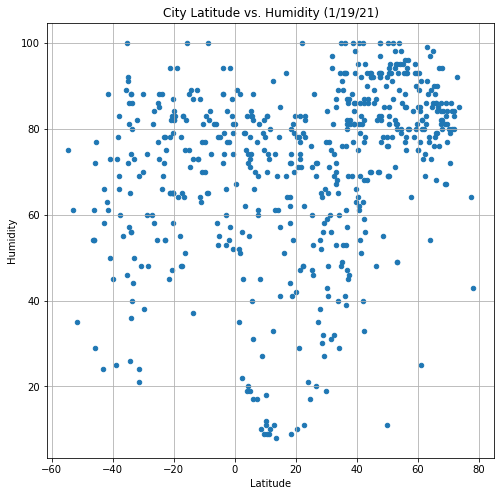

In [21]:
#Latitude vs Humidity
world_weather_df.plot(kind="scatter", x= "Lat", y="Humidity", grid=True, figsize=(8,8), title= "City Latitude vs. Humidity (1/19/21)")
plt.xlabel("Latitude")
plt.savefig("output_data/Lat_vs_Humidity.png")
plt.show()

## Analysis of City Latitude vs Humidity
This plot suggests that there seems to be no relationship between latitude and humidity levels.

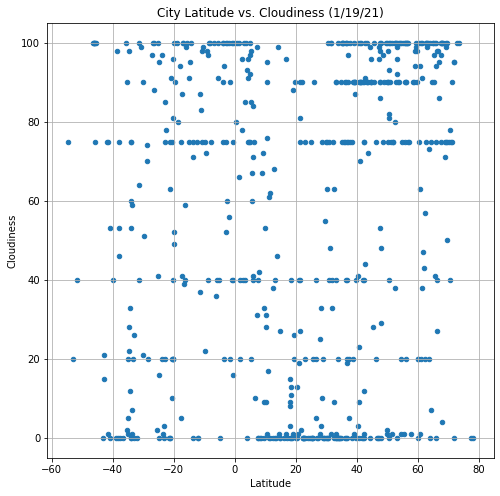

In [22]:
#Latitude vs. Cloudiness
world_weather_df.plot(kind="scatter", x= "Lat", y="Cloudiness", grid=True, figsize=(8,8), title= "City Latitude vs. Cloudiness (1/19/21)")
plt.xlabel("Latitude")
plt.savefig("output_data/Lat_vs_Cloudiness.png")
plt.show()

## Analysis of City Latitude vs Cloudiness
This plot indicates there seems to be no relationship between latitude and cloudiness.

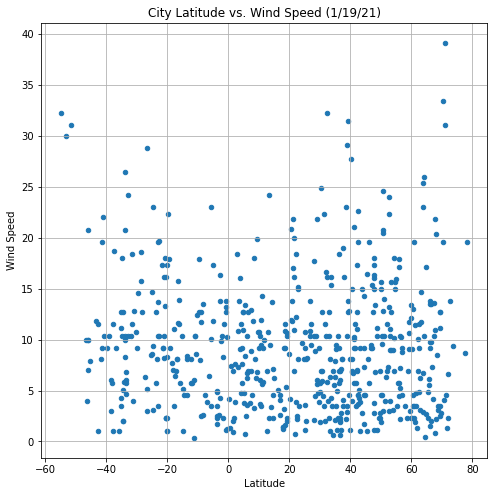

In [23]:
#Latitude vs Wind Speed
world_weather_df.plot(kind="scatter", x= "Lat", y="Wind Speed", grid=True, figsize=(8,8), title= "City Latitude vs. Wind Speed (1/19/21)")
plt.xlabel("Latitude")
plt.savefig("output_data/Lat_vs_WindSpeed.png")
plt.show()

## Analysis of City Latitude vs Wind Speed
This plot shows that there seems to be no relationship between latitude and windspeed.

The r-squared is: 0.7621234995868092


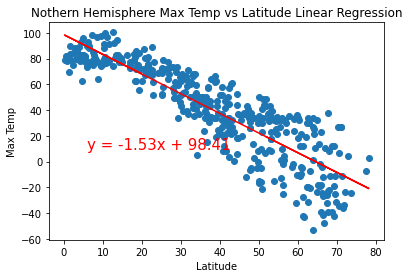

In [14]:
#Northern Hemishpere - Max Temp vs Latitude Linear Regression
northern_weather = world_weather_df.loc[world_weather_df["Lat"]>0]
x_values = northern_weather['Lat']
y_values = northern_weather['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Nothern Hemisphere Max Temp vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Northern Hemisphere Max Temp vs Latitude Linear Regression
This graph shows a strong relationship between latitude and max temp in the northern Hemishpere. First of all, an r-squared value of 0.75 and a slope of close to 1 indicate a fairly strong, linear relationship. What we are also seeing is that as we are moving away from the equator and toward the north pole (which would be at latitude 90) we see that the max tempertaure in that paritcular area is steadily decreasing. This also makes sense based on ones basic knowledge of what the north pole is like. 

The r-squared is: 0.38134106665732825


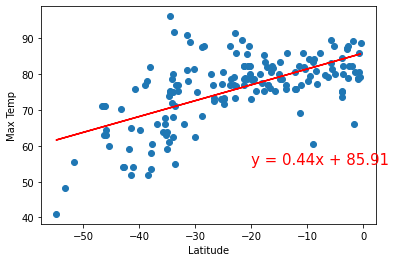

In [15]:
#Southern Hemishpere - Max Temp vs Latitude Linear Regression
southern_weather = world_weather_df.loc[world_weather_df["Lat"]<0]
x_values = southern_weather['Lat']
y_values = southern_weather['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Southern Hemisphere Max Temp vs Latitue Linear Regression 
For the southern hemisphere, we see a similar relationship as the northern hemisphere but not as strong of a correlation. The r-squared value is significantly lower than that of the northern hemisphere, and we do not have a slope for the regression line which is 1 or greater. However, these statistical measures don't determine everything. When one looks at the graph, one can see that as the latitudes decrease, the max temps are increasing. They are not as closely clustered around the trend line as the northern hemisphere plot, but the same trend here is occuring. Therefore, I would also claim that there is a fairly strong relationship between latitude and max temp in the southern hemisphere. 

The r-squared is: 0.20143470316114934


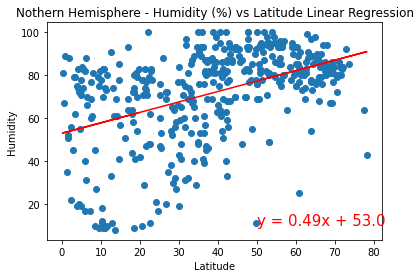

In [16]:
#Nothern Hemishpere - Humidity(%) vs. Latitude 
x_values = northern_weather['Lat']
y_values = northern_weather['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Nothern Hemisphere - Humidity (%) vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Northern Hemisphere - Humidity vs Latitude Linear Regression
Based on the statistical measures and appearnce of the plot, there seems to be a moderate correlation between latitude and humidity. Aside from a few outliers, the humidity levels generally seem to be increasing as we get further from the equator. 

The r-squared is: 0.08938399487176625


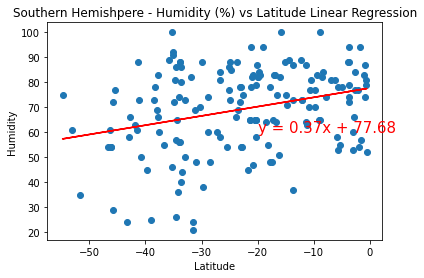

In [17]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#Southern Hemishpere - Max Temp vs Latitude Linear Regression
x_values = southern_weather['Lat']
y_values = southern_weather['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemishpere - Humidity (%) vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Southern Hemisphere - Humidity vs Latitude Linear Regression
For the southern hemisphere, there only seems to be a weak relationship if any between latitude and humidity level. In this plot we are seeing very scattered datapoints, and only a slight increase in humidity as we move toward the equator. Statistcal measures are not very strong as well. 

The r-squared is: 0.04692609634436775


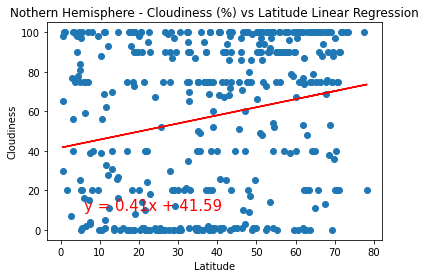

In [15]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_weather['Lat']
y_values = northern_weather['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Nothern Hemisphere - Cloudiness (%) vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Northern Hemishpere Cloudiness vs Latitude Linear Regression
Based on the plot, it seems that there is no relationship between clouidness and latitude in the northern hemisphere.

The r-squared is: 0.13012749360955211


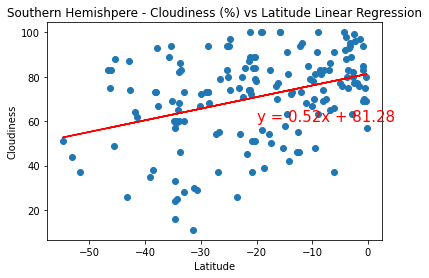

In [16]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_weather['Lat']
y_values = southern_weather['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemishpere - Cloudiness (%) vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Southern Hemisphere Cloudiness vs Latitude Linear Regression
In the southern hemisphere, it seems that there is a slight relationship between latitude and cloudiness level. Although the datapoints are little scattered in spots, we can see a slight general increase in cloudiness factor as we move toward the equator. 

The r-squared is: 0.0033804994407919996


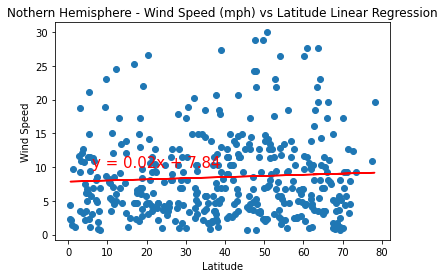

In [17]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_weather['Lat']
y_values = northern_weather['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Nothern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()


## Analysis of Northern Hemishpere Wind Speed vs Latitude Linear Regression
Based on the plot, it seems that there is no relationship between wind speed and latitude in the northern hemisphere.

The r-squared is: 0.04050211687671345


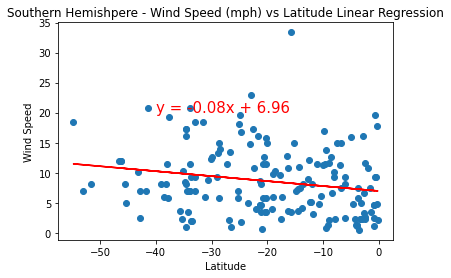

In [19]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_weather['Lat']
y_values = southern_weather['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemishpere - Wind Speed (mph) vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Analysis of Southern Hemishpere Wind Speed vs Latitude Linear Regression
Based on the plot, it seems that there is no relationship between wind speed and latitude in the southern hemisphere. 